In [44]:
# 環境構築
# pip3 install --upgrade setuptools pip
# pip3 uninstall jinja2 tornado
# pip3 install --upgrade notebook jupyterhub

In [1]:
import os
import pandas as pd
from pycaret.regression import *

https://resanaplaza.com/2022/03/20/%E3%80%90%E3%82%84%E3%81%95%E3%81%97%E3%81%8F%E5%9B%B3%E8%A7%A3%E3%80%91pycaret%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9%EF%BC%88windows%EF%BC%89/#:~:text=Pycaret%E3%81%AE%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E6%96%B9%E6%B3%95,-%E3%81%82%E3%82%89%E3%81%8B%E3%81%98%E3%82%81%E3%80%81%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E3%81%95%E3%82%8C&text=%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E6%96%B9%E6%B3%95%E3%81%AF%E4%BB%96%E3%81%AE,%E3%83%91%E3%83%83%E3%82%B1%E3%83%BC%E3%82%B8%E3%82%82%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E3%81%95%E3%82%8C%E3%81%BE%E3%81%99%E3%80%82

https://torch.classcat.com/2020/12/18/pycaret-2-2-tutorials-regression-reg101/

In [45]:
pd.set_option('display.max_columns', None)

In [31]:
file = '/Users/tomoyauchiyama/Downloads/msk_impact_2017/data_mutations.txt'
df = pd.read_csv(file, sep='\t', header=1)

In [32]:
df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,cDNA_change
0,SPEN,NaN,NaN,GRCh37,1,16265908,16265908,+,missense_variant,Missense_Mutation,...,NaN,ENST00000375759.3:c.10981A>T,p.Ile3661Phe,p.I3661F,ENST00000375759,NM_015001.2,3661.0,Att/Ttt,0,c.10981A>T
1,ALK,NaN,NaN,GRCh37,2,29543736,29543736,+,missense_variant,Missense_Mutation,...,NaN,ENST00000389048.3:c.1427T>C,p.Val476Ala,p.V476A,ENST00000389048,NM_004304.4,476.0,gTg/gCg,0,c.1427T>C
2,PDCD1,NaN,NaN,GRCh37,2,242793433,242793433,+,missense_variant,Missense_Mutation,...,NaN,ENST00000334409.5:c.644C>T,p.Ala215Val,p.A215V,ENST00000334409,NM_005018.2,215.0,gCc/gTc,0,c.644C>T
3,MAP3K1,NaN,NaN,GRCh37,5,56177843,56177843,+,missense_variant,Missense_Mutation,...,NaN,ENST00000399503.3:c.2816C>G,p.Ser939Cys,p.S939C,ENST00000399503,NM_005921.1,939.0,tCt/tGt,0,c.2816C>G
4,FLT4,NaN,NaN,GRCh37,5,180030313,180030313,+,missense_variant,Missense_Mutation,...,NaN,ENST00000261937.6:c.3971G>T,p.Arg1324Leu,p.R1324L,ENST00000261937,NM_182925.4,1324.0,cGg/cTg,0,c.3971G>T


In [33]:
df.loc[:, ["Tumor_Sample_Barcode", "Hugo_Symbol"]].head()

,Tumor_Sample_Barcode,Hugo_Symbol
0,P-0000004-T01-IM3,SPEN
1,P-0000004-T01-IM3,ALK
2,P-0000004-T01-IM3,PDCD1
3,P-0000004-T01-IM3,MAP3K1
4,P-0000004-T01-IM3,FLT4


In [34]:
len(df['Tumor_Sample_Barcode'].unique())

10129

In [35]:
len(df['Hugo_Symbol'].unique())

414

In [76]:
df_mutation_count = pd.crosstab(df["Tumor_Sample_Barcode"], df["Hugo_Symbol"]).reset_index()

In [77]:
df_mutation_count.head()

Hugo_Symbol,Tumor_Sample_Barcode,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,...,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
0,P-0000004-T01-IM3,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,P-0000015-T01-IM3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,P-0000023-T01-IM3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,P-0000024-T01-IM3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,P-0000025-T01-IM3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_mutation_count.columns

Index(['Tumor_Sample_Barcode', 'ABL1', 'ACVR1', 'AKT1', 'AKT2', 'AKT3', 'ALK',
       'ALOX12B', 'AMER1', 'ANKRD11',
       ...
       'VHL', 'VTCN1', 'WT1', 'XIAP', 'XPO1', 'XRCC2', 'YAP1', 'YES1', 'ZFHX3',
       'ZRSR2'],
      dtype='object', name='Hugo_Symbol', length=415)

In [38]:
df_mutation_count.shape

(10129, 414)

In [71]:
df_mutation_count.describe()

Hugo_Symbol,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,...,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,...,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,0.015303,0.004838,0.017475,0.006713,0.011156,0.035147,0.008589,0.023003,0.025077,0.165465,...,0.020239,0.004443,0.009675,0.004443,0.011057,0.003455,0.006220,0.006812,0.046007,0.004048
std,0.137911,0.070796,0.133279,0.084047,0.119957,0.204484,0.096468,0.181500,0.186859,0.555445,...,0.142911,0.070822,0.106582,0.067977,0.118725,0.058684,0.081096,0.096610,0.286023,0.069438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.000000,7.000000,4.000000,13.000000,...,2.000000,2.000000,4.000000,2.000000,4.000000,1.000000,2.000000,5.000000,8.000000,3.000000


In [ ]:
#df_mutation = df_mutation_count.clip(upper=1).reset_index()

In [94]:
file = '/Users/tomoyauchiyama/Downloads/code/msk_impact_CC_mut_reg.txt'
df_data = pd.read_csv(file, sep='\t').drop(columns=['Mutation Count']).dropna()
df_sel_mod = df_data.loc[:, ['Sample ID', 'Overall Survival (Months)', 'Sex_Female', 'Sex_Male', 'Overall Survival Status_0:LIVING', 'Overall Survival Status_1:DECEASED',  'Smoking History_Never', 'Smoking History_Prev/Curr Smoker', 'Smoking History_Unknown']].reset_index(drop=True)

In [95]:
df_sel_mod.head()

,Sample ID,Overall Survival (Months),Sex_Female,Sex_Male,Overall Survival Status_0:LIVING,Overall Survival Status_1:DECEASED,Smoking History_Never,Smoking History_Prev/Curr Smoker,Smoking History_Unknown
0,P-0000241-T01-IM3,5.59,1,0,0,1,1,0,0
1,P-0000552-T01-IM3,3.39,0,1,0,1,0,1,0
2,P-0000635-T01-IM3,28.44,0,1,0,1,0,1,0
3,P-0000687-T01-IM3,9.96,1,0,1,0,1,0,0
4,P-0000695-T01-IM3,14.30,0,1,0,1,1,0,0


In [96]:
df_merge = pd.merge(df_sel_mod, df_mutation_count, left_on='Sample ID', right_on='Tumor_Sample_Barcode')

In [97]:
df_merge.shape

(447, 424)

In [98]:
df_merge.head()

,Sample ID,Overall Survival (Months),Sex_Female,Sex_Male,Overall Survival Status_0:LIVING,Overall Survival Status_1:DECEASED,Smoking History_Never,Smoking History_Prev/Curr Smoker,Smoking History_Unknown,Tumor_Sample_Barcode,...,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
0,P-0000241-T01-IM3,5.59,1,0,0,1,1,0,0,P-0000241-T01-IM3,...,0,0,0,0,0,0,0,0,0,0
1,P-0000552-T01-IM3,3.39,0,1,0,1,0,1,0,P-0000552-T01-IM3,...,0,0,0,0,0,0,0,0,0,0
2,P-0000635-T01-IM3,28.44,0,1,0,1,0,1,0,P-0000635-T01-IM3,...,0,0,1,0,0,0,0,0,0,0
3,P-0000687-T01-IM3,9.96,1,0,1,0,1,0,0,P-0000687-T01-IM3,...,0,0,0,0,0,0,0,0,0,0
4,P-0000695-T01-IM3,14.30,0,1,0,1,1,0,0,P-0000695-T01-IM3,...,0,0,0,0,0,0,0,0,0,0


In [99]:
file = '/Users/tomoyauchiyama/Downloads/code/msk_impact_CC_mutation_v02.txt'
df_merge.to_csv(file, sep='\t', index=False)

In [100]:
df_data = df_merge.drop(columns=['Sample ID', 'Tumor_Sample_Barcode'])

In [101]:
s = setup(df_data, target='Overall Survival (Months)')

,Description,Value
0,Session id,1667
1,Target,Overall Survival (Months)
2,Target type,Regression
3,Original data shape,"(447, 422)"
4,Transformed data shape,"(447, 422)"
5,Transformed train set shape,"(312, 422)"
6,Transformed test set shape,"(135, 422)"
7,Numeric features,421
8,Preprocess,True
9,Imputation type,simple


In [102]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,5.6931,48.7646,6.9540,0.0281,0.5943,1.0468,0.1630
lightgbm,Light Gradient Boosting Machine,5.5142,48.6033,6.9420,0.0145,0.5614,0.8781,0.0910
br,Bayesian Ridge,5.7095,49.9960,7.0447,0.0041,0.5950,1.0325,0.1700
gbr,Gradient Boosting Regressor,5.6747,50.0101,7.0497,-0.0070,0.5790,0.9699,0.2520
en,Elastic Net,5.7945,51.2366,7.1317,-0.0195,0.6017,1.0558,0.1090
llar,Lasso Least Angle Regression,5.8278,51.8791,7.1761,-0.0321,0.6045,1.0615,0.0860
dummy,Dummy Regressor,5.8278,51.8791,7.1761,-0.0321,0.6045,1.0615,0.0930
lasso,Lasso Regression,5.8278,51.8791,7.1761,-0.0321,0.6045,1.0615,0.0880
rf,Random Forest Regressor,5.9385,55.7400,7.4134,-0.1286,0.5907,0.9104,0.4450
knn,K Neighbors Regressor,6.7259,70.1199,8.3245,-0.4155,0.6691,1.2205,0.0890


In [103]:
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.5706,60.4120,7.7725,-0.0007,0.6106,0.7903
1,5.5567,42.0395,6.4838,0.1265,0.5458,0.7448
2,5.7516,40.9649,6.4004,0.0405,0.5874,0.9573
3,5.5147,55.2526,7.4332,-0.1357,0.4712,0.4405
4,5.0785,37.8564,6.1528,0.1383,0.5485,1.2646
5,5.0453,51.6982,7.1901,0.2414,0.5914,0.8875
6,6.0202,50.9396,7.1372,0.1148,0.7000,1.6789
7,5.1918,40.1447,6.3360,0.0718,0.5954,1.0027
8,5.6147,46.1156,6.7908,0.1829,0.5304,0.6553


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

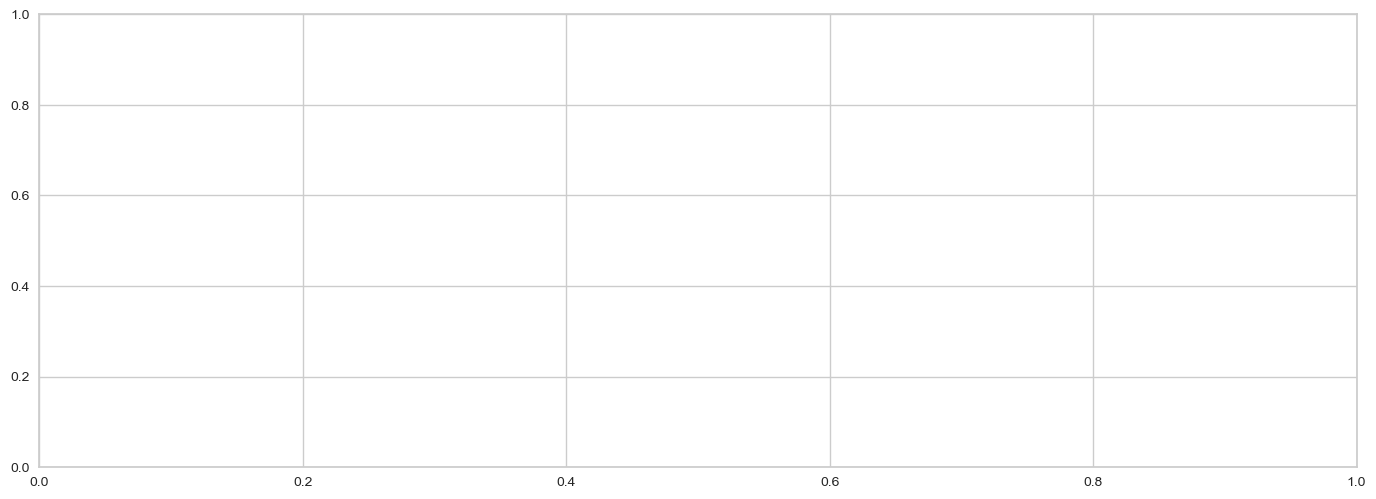

In [104]:
evaluate_model(tuned_best)

In [ ]:
# ここから再開
file = '/Users/tomoyauchiyama/Downloads/code/msk_impact_CC_mutation.txt'
df = pd.read_csv(file)

In [ ]:
# On-Hotエンコーディング
df_sex_life = df.loc[:, ['Overall Survival Status', 'Sex', 'Smoking History']]

In [ ]:
df_sex_life.head()

,Overall Survival Status,Sex,Smoking History
0,1:DECEASED,Female,Never
1,1:DECEASED,Female,Never
2,0:LIVING,Male,Prev/Curr Smoker
3,0:LIVING,Female,Never
4,1:DECEASED,Male,Prev/Curr Smoker


In [ ]:
df_dummy = pd.get_dummies(df_sex_life)

In [ ]:
df_dummy.head()

,Overall Survival Status_0:LIVING,Overall Survival Status_1:DECEASED,Sex_Female,Sex_Male,Smoking History_Never,Smoking History_Prev/Curr Smoker,Smoking History_Unknown
0,0,1,1,0,1,0,0
1,0,1,1,0,1,0,0
2,1,0,0,1,0,1,0
3,1,0,1,0,1,0,0
4,0,1,0,1,0,1,0


In [ ]:
df.head()

,Sample ID,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Sample coverage,Sample Type,Sex,Smoking History,Specimen Preservation Type,TMB (nonsynonymous),Tumor Purity,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
0,P-0000119-T01-IM3,250.0,0.2312,9,NaN,1:DECEASED,Cecum,610,Metastasis,Female,Never,FFPE,9.982398,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
# 特徴量の選択
df_drop = df.drop(columns=['Overall Survival Status', 'Primary Tumor Site', 'Sample Type', 'Sex', 'Smoking History', 'Specimen Preservation Type'])

In [ ]:
df_drop.head()

,Sample ID,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Sample coverage,TMB (nonsynonymous),Tumor Purity,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2
0,P-0000119-T01-IM3,250.0,0.2312,9,NaN,610,9.982398,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
df_merge = pd.concat([df_drop, df_dummy], axis=1)

In [ ]:
df_merge.head()

,Sample ID,DNA Input,Fraction Genome Altered,Mutation Count,Overall Survival (Months),Sample coverage,TMB (nonsynonymous),Tumor Purity,ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,ANKRD11,APC,AR,ARAF,ARID1A,ARID1B,ARID2,ARID5B,ASXL1,ASXL2,ATM,ATR,ATRX,AURKA,AURKB,AXIN1,AXIN2,AXL,B2M,BAP1,BARD1,BBC3,BCL10,BCL2,BCL2L1,BCL2L11,BCL6,BCOR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD4,BRIP1,BTK,CALR,CARD11,CASP8,CBFB,CBL,CCND1,CCND2,CCND3,CCNE1,CD274,CD276,CD79A,CD79B,CDC73,CDH1,CDK12,CDK4,CDK6,CDK8,CDKN1A,CDKN1B,CDKN2A,CDKN2B,CDKN2C,CEBPA,CENPA,CHEK1,CHEK2,CIC,CREBBP,CRKL,CRLF2,CSF1R,CSF3R,CTCF,CTLA4,CTNNB1,CUL3,CXCR4,DAXX,DCUN1D1,DDR2,DICER1,DIS3,DNAJB1,DNMT1,DNMT3A,DNMT3B,DOT1L,E2F3,EED,EGFL7,EGFR,EIF1AX,EIF4A2,EIF4E,EP300,EPCAM,EPHA3,EPHA5,EPHA7,EPHB1,ERBB2,ERBB3,ERBB4,ERCC2,ERCC3,ERCC4,ERCC5,ERG,ERRFI1,ESR1,ETV1,ETV6,EZH2,FAM175A,FAM46C,FANCA,FANCC,FAT1,FBXW7,FGF19,FGF3,FGF4,FGFR1,FGFR2,FGFR3,FGFR4,FH,FIP1L1,FLCN,FLT1,FLT3,FLT4,FOXA1,FOXL2,FOXO1,FOXP1,FUBP1,FYN,GATA1,GATA2,GATA3,GLI1,GNA11,GNAQ,GNAS,GPS2,GREM1,GRIN2A,GSK3B,H3F3A,H3F3B,H3F3C,HGF,HIST1H1C,HIST1H2BD,HIST1H3A,HIST1H3B,HIST1H3C,HIST1H3D,HIST1H3E,HIST1H3F,HIST1H3G,HIST1H3H,HIST1H3I,HIST1H3J,HIST2H3D,HIST3H3,HLA-A,HNF1A,HOXB13,HRAS,ICOSLG,ID3,IDH1,IDH2,IFNGR1,IGF1,IGF1R,IGF2,IKBKE,IKZF1,IL10,IL7R,INHA,INHBA,INPP4A,INPP4B,INSR,INSRR,IRF4,IRS1,IRS2,JAK1,JAK2,JAK3,JUN,KDM5A,KDM5C,KDM6A,KDR,KEAP1,KIT,KLF4,KRAS,LATS1,LATS2,LMO1,MALT1,MAP2K1,MAP2K2,MAP2K4,MAP3K1,MAP3K13,MAP3K14,MAPK1,MAPK3,MAX,MCL1,MDC1,MDM2,MDM4,MED12,MEF2B,MEN1,MET,MGA,MITF,MLH1,MLL,MLL2,MLL3,MPL,MRE11A,MSH2,MSH6,MST1,MST1R,MTOR,MUTYH,MYC,MYCL1,MYCN,MYD88,MYOD1,NBN,NCOA3,NCOR1,NEGR1,NF1,NF2,NFE2L2,NFKBIA,NKX2-1,NKX3-1,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPM1,NRAS,NSD1,NTRK1,NTRK2,NTRK3,NUP93,OBSL1,PAK1,PAK7,PALB2,PARK2,PARP1,PAX5,PBRM1,PDCD1,PDGFRA,PDGFRB,PDPK1,PGR,PHOX2B,PIK3C2G,PIK3C3,PIK3CA,PIK3CB,PIK3CD,PIK3CG,PIK3R1,PIK3R2,PIK3R3,PIM1,PLCG2,PLK2,PMAIP1,PMS1,PMS2,PNRC1,POLD1,POLE,PPM1D,PPP2R1A,PPP6C,PRDM1,PRKAR1A,PTCH1,PTEN,PTPN11,PTPRD,PTPRS,PTPRT,RAB35,RAC1,RAD21,RAD50,RAD51,RAD51B,RAD51C,RAD51D,RAD52,RAD54L,RAF1,RARA,RASA1,RB1,RBM10,RECQL4,REL,RET,RFWD2,RHEB,RHOA,RICTOR,RIT1,RNF43,ROS1,RPS6KA4,RPS6KB2,RPTOR,RUNX1,RYBP,SDCCAG8,SDHA,SDHAF2,SDHB,SDHC,SDHD,SETD2,SF3B1,SH2B3,SH2D1A,SHQ1,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMO,SOCS1,SOX17,SOX2,SOX9,SPEN,SPOP,SRC,SRSF2,STAG2,STAT3,STAT5A,STAT5B,STK11,STK40,SUFU,SUZ12,SYK,TBX3,TCEB1,TCF3,TCF7L2,TERT,TET1,TET2,TGFBR1,TGFBR2,TIMM8B,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TOP1,TP53,TP63,TRAF2,TRAF7,TSC1,TSC2,TSHR,U2AF1,VEGFA,VHL,VTCN1,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,Overall Survival Status_0:LIVING,Overall Survival Status_1:DECEASED,Sex_Female,Sex_Male,Smoking History_Never,Smoking History_Prev/Curr Smoker,Smoking History_Unknown
0,P-0000119-T01-IM3,250.0,0.2312,9,NaN,610,9.982398,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
df_data = df_merge.drop(columns=['Sample ID']).dropna()

In [ ]:
df_data.shape

(678, 428)

In [ ]:
df_data.shape

(435, 428)

In [ ]:
# https://qiita.com/ryo_hagiwara/items/343d23904cad570b03b5
# touchiyama:09:08:06:@Mac:~/Downloads $ brew install libomp
# touchiyama:09:08:06:@Mac:~/Downloads $ pip uninstall lightgbm
# touchiyama:09:08:06:@Mac:~/Downloads $ pip install lightgbm

In [ ]:
s = setup(df_data, target='Overall Survival (Months)')

,Description,Value
0,Session id,4164
1,Target,Overall Survival (Months)
2,Target type,Regression
3,Original data shape,"(435, 428)"
4,Transformed data shape,"(435, 428)"
5,Transformed train set shape,"(304, 428)"
6,Transformed test set shape,"(131, 428)"
7,Numeric features,427
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,5.2377,45.5164,6.6756,0.0865,0.5950,1.1813,0.5030
br,Bayesian Ridge,5.3685,47.6288,6.8439,0.0500,0.6133,1.1903,0.1890
gbr,Gradient Boosting Regressor,5.3655,47.9809,6.8581,0.0475,0.6070,1.1231,0.3030
ada,AdaBoost Regressor,5.5472,48.3289,6.8983,0.0319,0.6160,1.2508,0.2340
lightgbm,Light Gradient Boosting Machine,5.4998,48.1141,6.8756,0.0216,0.6002,1.1531,0.2480
en,Elastic Net,5.5544,50.3177,7.0440,-0.0091,0.6224,1.2300,0.2310
et,Extra Trees Regressor,5.3624,49.0559,6.9311,-0.0111,0.6206,1.0854,0.5300
lasso,Lasso Regression,5.5844,50.4745,7.0552,-0.0134,0.6216,1.2311,0.2520
llar,Lasso Least Angle Regression,5.5844,50.4745,7.0552,-0.0134,0.6216,1.2311,0.1890
huber,Huber Regressor,5.4399,51.3164,7.1060,-0.0355,0.6442,1.1982,0.2270


In [27]:
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4273,30.1381,5.4898,-0.0201,0.6401,1.9762
1,6.5872,60.0687,7.7504,-0.0165,0.6887,1.2694
2,6.3462,61.2969,7.8292,-0.0399,0.6807,1.3267
3,5.1571,38.4705,6.2025,-0.0296,0.5414,0.7015
4,4.3568,29.1731,5.4012,0.0122,0.4186,0.4468
5,7.2729,77.6225,8.8104,-0.0268,0.8350,1.7767
6,5.3271,42.7449,6.5380,0.0176,0.7339,1.8492
7,5.9053,58.0648,7.6200,0.0244,0.7027,1.7200
8,5.3924,45.1661,6.7206,0.0055,0.5497,0.7470


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

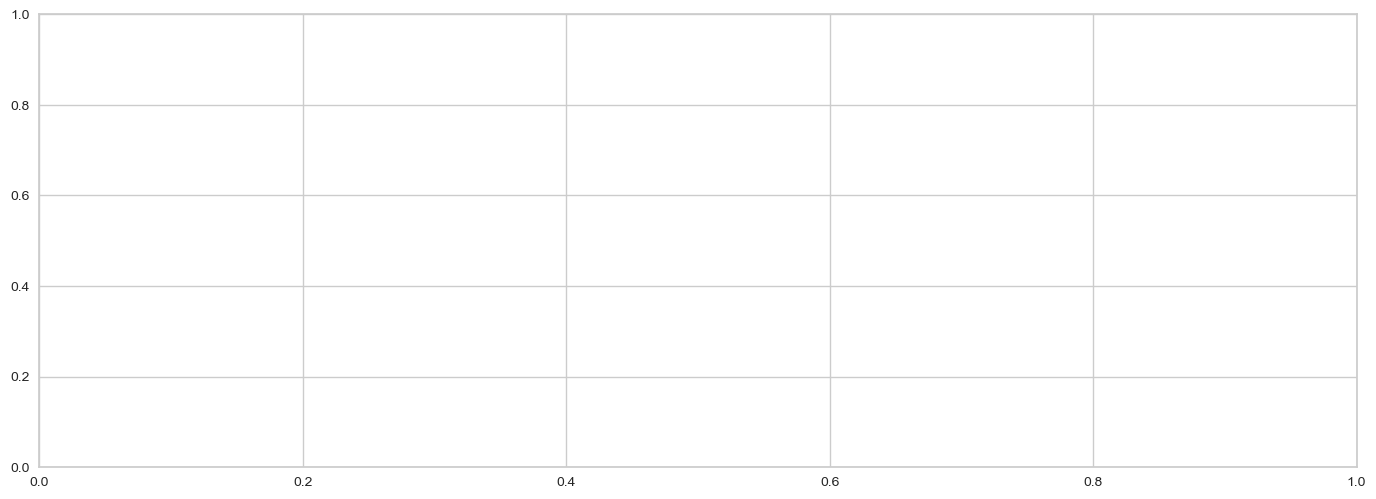

In [28]:
evaluate_model(tuned_best)

In [22]:
file = '/Users/tomoyauchiyama/Downloads/code/msk_impact_CC_mut_reg.txt'
df_data = pd.read_csv(file, sep='\t').drop(columns=['Sample ID', 'Overall Survival Status_0:LIVING', 'Overall Survival Status_1:DECEASED', 'Smoking History_Never', 'Smoking History_Prev/Curr Smoker', 'Smoking History_Unknown']).dropna()

In [23]:
df_data.head()

,Mutation Count,Overall Survival (Months),ABL1,ACVR1,AKT1,AKT2,AKT3,ALK,ALOX12B,AMER1,...,WT1,XIAP,XPO1,XRCC2,YAP1,YES1,ZFHX3,ZRSR2,Sex_Female,Sex_Male
1,8,5.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,6,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
6,5,28.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
9,7,9.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
10,5,14.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [24]:
df_data.shape

(447, 418)

In [25]:
s = setup(df_data, target='Overall Survival (Months)')

,Description,Value
0,Session id,1394
1,Target,Overall Survival (Months)
2,Target type,Regression
3,Original data shape,"(447, 418)"
4,Transformed data shape,"(447, 418)"
5,Transformed train set shape,"(312, 418)"
6,Transformed test set shape,"(135, 418)"
7,Numeric features,417
8,Preprocess,True
9,Imputation type,simple


In [26]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,5.8007,51.4549,7.0874,-0.0165,0.6476,1.3029,0.3250
dummy,Dummy Regressor,5.8041,51.7650,7.1058,-0.0199,0.6423,1.2741,0.2210
br,Bayesian Ridge,5.8027,51.7706,7.1062,-0.0200,0.6422,1.2739,0.1630
lasso,Lasso Regression,5.8014,51.8015,7.1086,-0.0207,0.6423,1.2740,0.0910
llar,Lasso Least Angle Regression,5.8014,51.8015,7.1086,-0.0207,0.6423,1.2740,0.0920
en,Elastic Net,5.8019,51.8046,7.1088,-0.0208,0.6423,1.2741,0.0930
lightgbm,Light Gradient Boosting Machine,5.9196,53.8289,7.2547,-0.0788,0.6411,1.1889,0.2810
rf,Random Forest Regressor,5.9655,55.3349,7.3497,-0.0966,0.6499,1.2473,0.4770
gbr,Gradient Boosting Regressor,6.1107,58.5686,7.5755,-0.1708,0.6649,1.2558,0.3930
knn,K Neighbors Regressor,6.2461,60.4362,7.7378,-0.2650,0.6639,1.2395,0.1320


In [20]:
print(best)

DummyRegressor()


In [ ]:
tuned_best = tune_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

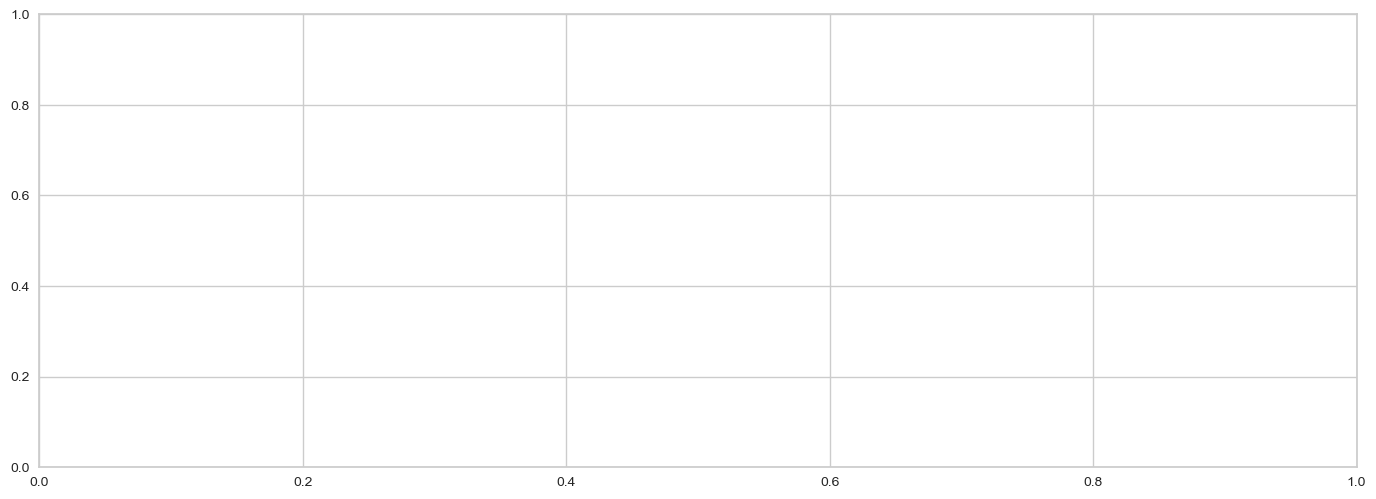

In [21]:
evaluate_model(best)